# Cifar10 Neural Nets vs classic algorithms

On this notebook we are going to compare neural networks performanc against the classic algorithms on the same task.

## The dataset:
As we mentoioned, we are going to use the CIFAR10 data. Let's take a look:

The dataset is composed by 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. These are the image classes:
- airplane 
- automobile 
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [1]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

from tensorflow import keras
from tensorflow.keras.datasets import cifar10



# from tensorflow.keras.datasets.cifar10 import load_data
# (trainX, trainY), (testX, testY) = load_data()
# # normalize pixel values
# trainX = trainX.astype('float32') / 255
# testX = testX.astype('float32') / 255
# # one hot encode target values
# trainY = to_categorical(trainY)
# testY = to_categorical(testY)
# trainX[0].shape



num_classes = 10
# The data, split between train and test sets:
(trainX, y_train), (testX, y_test) = cifar10.load_data()
x_train = trainX.reshape(trainX.shape[0],-1)
x_test = testX.reshape(testX.shape[0], -1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)







x_train shape: (50000, 3072)
50000 train samples
10000 test samples


<font color=red><b>Plot some examples of the dataset.
<br>Hint: use the imshow function of the pyplot package</b>
</font>

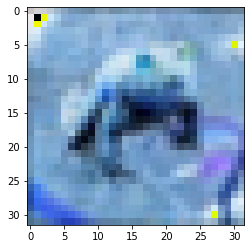

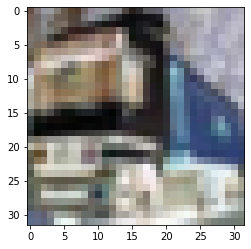

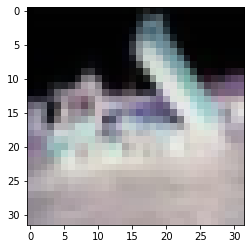

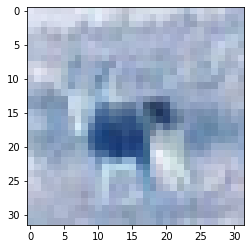

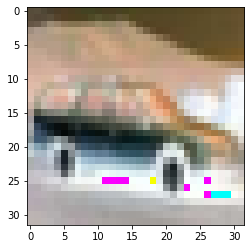

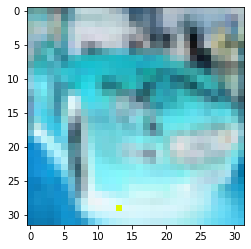

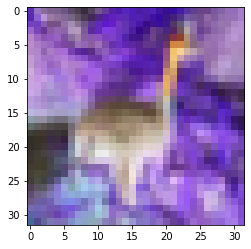

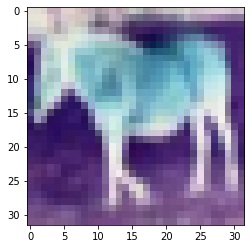

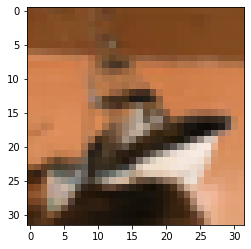

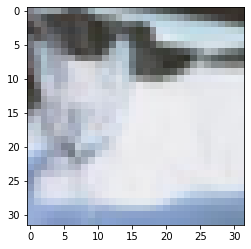

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
for j in range (10):
    plt.imshow((trainX[j]*255).astype('uint8'))
    plt.show()
    

## Classic approach
One of the main takeouts from DL is that it extract features from the data. We are facing images. So, let's reduce the disadvantage of the classic algorithms and first, let's get some interesting features. We will do a feature extraction using pca, and then will test against some algorithms like random forest, svm, knn or logistic regression

### PCA

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

<font color=red><b>Perform the PCA fitting to the data and extract the optimal number of components to explain at least 95% of the variance explained
<br>Hint: find the appropiated attribute on the pca</b>
</font>

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train)

# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

<font color=red><b> Now create the pca with the given number of components. Fit the training and transform the testing data.
<br>Hint: Use whiten=True</b>
</font>

In [5]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

<font color=red><b>  Train and evaluate the random forest
<br>Hint: What data are you using?</b>
</font>

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

## Predicting
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.005

<font color=red><b>  Train and evaluate the knn
<br>Hint: What data are you using?</b>
</font>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.1065

<font color=red><b>  Train and evaluate the logistic regression
<br>Hint: What data are you using?</b>
</font>

In [8]:
from sklearn.linear_model import LogisticRegression
(_, y_train), (_, y_test) = cifar10.load_data()

## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

/home/fer/data/venvs/dl_tf2/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4024

<font color=red><b>  Train and evaluate the svm
<br>Hint: What data are you using?</b>
    <br>Hint: Don't do it. It takes forever.</b>
    <br>Hint: Really, please don't. It doesn't improve that much.</b>
</font>

### Results:

In [9]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
# print("Support Vector Classifier : ", svc_score) # 0.4838

RandomForestClassifier :  0.005
K Nearest Neighbors :  0.1065
Logistic Regression :  0.4024


In [10]:
num_classes = 10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train)

# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
print(k)

## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)



## Training
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

## Predicting
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

(_, y_train), (_, y_test) = cifar10.load_data()
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

# ## Training
# svc = svm.SVC()
# svc.fit(x_train_pca, y_train)



# ## Predicting 
# y_pred_svm = svc.predict(x_test_pca)
# svc_score = accuracy_score(y_test, y_pred_svm)
# svc_score


print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
# print("Support Vector Classifier : ", svc_score)

x_train shape: (50000, 3072)
50000 train samples
10000 test samples
658


/home/fer/data/venvs/dl_tf2/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier :  0.0065
K Nearest Neighbors :  0.1064
Logistic Regression :  0.4043


## The neural nets
Will a neural net be able to improve those results? Let's see.

<font color=red><b> Build the architecture you like for the neural network. Is it better or worse?
</font>

In [11]:
from  keras.layers  import Dense

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




k = 658
from keras.models import Sequential
model = Sequential()
# For first layer, input shape must be supplied
layer1 = Dense(units = 50, activation = 'relu', input_dim = k)
model.add(layer1)

layer2 = Dense(units = 25, activation = 'relu')
model.add(layer2)

layer3 = Dense(units = 10, activation = 'sigmoid')
model.add(layer3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train_pca, y_train, epochs=10, validation_data = (x_test_pca, y_test))

Using TensorFlow backend.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.3088 - accuracy: 0.8926 - val_loss: 0.2658 - val_accuracy: 0.9043
Epoch 2/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.2490 - accuracy: 0.9081 - val_loss: 0.2531 - val_accuracy: 0.9073
Epoch 3/10
50000/50000 [==============================] - 3s 60us/step - loss: 0.2309 - accuracy: 0.9125 - val_loss: 0.2482 - val_accuracy: 0.9094
Epoch 4/10
50000/50000 [==============================] - 3s 70us/step - loss: 0.2172 - accuracy: 0.9166 - val_loss: 0.2458 - val_accuracy: 0.9094
Epoch 5/10
50000/50000 [==============================] - 3s 60us/step - loss: 0.2062 - accuracy: 0.9201 - val_loss: 0.2464 - val_accuracy: 0.9093
Epoch 6/10
50000/50000 [==============================] - 3s 59us/step - loss: 0.1977 - accuracy: 0.9234 - val_loss: 0.2491 - val_accuracy: 0.9085
Epoch 7/10
50000/50000 [==============================] - 3s 59us/st

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from numpy import mean
from numpy import std


(trainX, trainY), (testX, testY) = cifar10.load_data()
# normalize pixel values
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255
# one hot encode target values
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


step_epochs = 3
batch_size = 128
model.fit(trainX, trainY, epochs=step_epochs, batch_size=batch_size, verbose=1)
model.evaluate(testX, testY, verbose=0)

Train on 50000 samples
Epoch 1/3
50000/50000 [==============================] - 6s 121us/sample - loss: 1.2288 - accuracy: 0.5705
Epoch 2/3
50000/50000 [==============================] - 4s 87us/sample - loss: 0.8524 - accuracy: 0.7031
Epoch 3/3
50000/50000 [==============================] - 4s 86us/sample - loss: 0.6786 - accuracy: 0.7629


[0.97792270154953, 0.6734]